# SPRINT 6 - PROJECT

# OBJETIVO. Identificar patrones que determinen si un juego tiene éxito o no.



## Descripción del proyecto

Trabajas para la tienda online Ice que vende videojuegos por todo el mundo. Las reseñas de usuarios y expertos, los géneros, las plataformas (por ejemplo, Xbox o PlayStation) y los datos históricos sobre las ventas de juegos están disponibles en fuentes abiertas. Tienes que identificar patrones que determinen si un juego tiene éxito o no. Esto te permitirá detectar proyectos prometedores y planificar campañas publicitarias.

Delante de ti hay datos que se remontan a 2016. Imaginemos que es diciembre de 2016 y estás planeando una campaña para 2017.

Lo importante es adquirir experiencia de trabajo con datos. Realmente no importa si estás pronosticando las ventas de 2017 en función de los datos de 2016 o las ventas de 2027 en función de los datos de 2026.

El dataset contiene una columna ‘rating’ que almacena la clasificación ESRB de cada juego. El Entertainment Software Rating Board (la Junta de clasificación de software de entretenimiento) evalúa el contenido de un juego y asigna una clasificación de edad como Adolescente o Adulto.


## Instrucciones para completar el proyecto
- Paso 1. Abre el archivo de datos y estudia la información general 
- Paso 2. Prepara los datos
- Paso 3. Analiza los datos
- Paso 4. Crea un perfil de usuario para cada región
- Paso 5. Prueba las siguientes hipótesis
- Paso 6. Escribe una conclusión general


# PASO 1. Abrir el archivo y estudiar la información general

### 1. Importar las Librerías

In [1]:
# Importar las librerías a utilizar
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency, ttest_ind
from scipy import stats as st
import warnings
warnings.filterwarnings("ignore")

### 1.1 Abrir y Leer el Archivo

In [2]:
# Abrir y leer el archivo
dataset = pd.read_csv('games.csv')
dataset.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


### 1.2 Obtener Información General del Archivo

In [3]:
# Obtener ivisión general de los datos
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


# Paso 2. Prepara los datos

### 2.1 Reemplazar los nombres de las columnas (@ minúsculas)

In [4]:
# Cambiar los nombres de las columnas a minúsculas
dataset.columns = dataset.columns.str.lower()
dataset.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

### 2.2 Convierte los datos en los tipos necesarios

In [5]:
# Revisar los valores ausentes
dataset.isna().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

#### 2.2.1 Comprobar y modificar datos en columna 'name'

In [6]:
# Comprobar valores NaNs en la columna 'name' 
dataset[pd.isnull(dataset['name'])]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


In [7]:
# Eliminar valores ausentes de la columna 'name' 
dataset = dataset[pd.notnull(dataset['name'])]


#### 2.2.2 Comprobar y modificar datos en columna 'year_of_release'

In [8]:
# Función para rellenar los valores ausentes
def fill_missing_value(data, agg_column, value_column):
    grouped_values = data.groupby(agg_column)[value_column].median().reset_index()
    size = len(grouped_values)
    for i in range(size):
        group = grouped_values[agg_column][i]
        value = grouped_values[value_column][i]
        data.loc[(data[agg_column]==group) & (data[value_column].isna()), value_column] = value
    return data

In [9]:
# Implementación de la función tomando en cuenta las columnas 'platform' y 'year_of_release' 
fill_missing_value(dataset, 'platform', 'year_of_release')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [10]:
# Cambiar el tipo de dato
dataset['year_of_release'] = dataset['year_of_release'].astype('int')

#### 2.2.3 Comprobar y modificar datos en columna 'critic_score'

In [11]:
# Implementación de la función tomando en cuenta 'genre' y 'critic_score' 
fill_missing_value(dataset, 'genre', 'critic_score')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,69.0,NaN,NaN
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,74.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,68.0,NaN,NaN
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,75.0,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,66.0,NaN,NaN
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,69.0,NaN,NaN


#### 2.2.4 Comprobar y modificar datos en columna 'user_score'

In [12]:
# Comprobar los datos únicos de 'user_score'
dataset['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

In [13]:
# Sumar cada tipo de dato de la columna
dataset['user_score'].value_counts()

user_score
tbd    2424
7.8     324
8       290
8.2     282
8.3     254
       ... 
1.1       2
1.9       2
9.6       2
0         1
9.7       1
Name: count, Length: 96, dtype: int64

In [14]:
# Reemplazar 'tbd' (to be determined) con 'NaN' 
dataset['user_score'] = dataset['user_score'].replace({'tbd' : np.nan})
dataset['user_score'] = dataset['user_score'].astype('float')

In [15]:
# Implementar la función tomando en cuenta 'genre' y 'user_score' 
fill_missing_value(dataset, 'genre', 'user_score')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,69.0,7.7,NaN
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,74.0,7.8,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,68.0,7.4,NaN
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,75.0,7.4,NaN
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,66.0,7.6,NaN
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,69.0,7.7,NaN


#### 2.2.5 Comprobar y modificar datos en columna 'rating'

In [16]:
# Comprobar los valores únicos de 'rating'
dataset['rating'].unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

In [17]:
# Crear nueva función para rellenar valores ausentes utilizando la moda como criterio 
def fill_missing_rating(data, agg_column, value_column):
    grouped_values = data.groupby(agg_column)[value_column].agg(pd.Series.mode).reset_index()
    size = len(grouped_values)
    for i in range(size):
        group = grouped_values[agg_column][i]
        value = grouped_values[value_column][i]
        data.loc[(data[agg_column]==group) & (data[value_column].isna()), value_column] = value
    return data

In [18]:
# Implementar la función tomando en cuenta 'genre' y 'rating' 
fill_missing_rating(dataset, 'genre', 'rating')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,69.0,7.7,E
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,74.0,7.8,T
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,68.0,7.4,T
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,75.0,7.4,E
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,66.0,7.6,E
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,69.0,7.7,E


#### 2.2.6 Comprobar los valores ausentes del dataset

In [19]:
# Verificar la información del dataset y comprobar valores ausentes
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16713 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16713 non-null  int32  
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     16713 non-null  float64
 9   user_score       16713 non-null  float64
 10  rating           16713 non-null  object 
dtypes: float64(6), int32(1), object(4)
memory usage: 1.5+ MB


### 2.3 Describe las columnas en las que los tipos de datos han sido cambiados y explica por qué

#### Respuesta: 

Encontré algunas columnas con problemas en los datos, como son:

- 'name': la columna contenía 2 valores con el nombre ausente, me parece un dato demasiado importante como para conservar el resto de la información por lo que decidí eliminar las filas.

- 'year_of_release': los años se expresaban con números decimales (float64), decidí cambiar el tipo de datos para corregir eso. Además, hay algunos espacios en blanco que me pareció importante rellenar.

- 'user_score': la información estaba representada como del tipo object, además de rellenar los valores ausentes, decidí cambiar el tipo de datos a float64, y modificar la palabra 'tbd' por 'nan' para no afectar los datos.

### 2.4 •	Si es necesario, elige la manera de tratar los valores ausentes:

#### Respuesta:

o	Explica por qué rellenaste los valores ausentes como lo hiciste o por qué decidiste dejarlos en blanco.
* Decidí rellenar los valores ausentes para un mejor análisis de la información en los pasos siguientes de este ejercicio. Además, considero que el dataset contiene demasiada información por lo que vi viable rellenar los valores ausentes utilizando media, mediana o moda. Para rellenar los valores ausentes de las siguientes columnas utilicé:
    - 'year_of_release': tomé en cuenta criterios como 'platform' & 'year_of_release' y al tratarse de valores numéricos rellené los valores ausentes con median (promedio). 
    - 'critic_score': tomé en cuenta criterios como 'genre' & 'critic_score' y al tratarse de valores numéricos rellené los valores ausentes con median (promedio).
    - 'rating': tomé en cuenta criterios como 'genre' & 'rating' y al tratarse de valores NO numéricos rellené los valores ausentes con mede (moda, el valor más utilizado).

o	¿Por qué crees que los valores están ausentes? Brinda explicaciones posibles.
* Creo que hay tres posibilidades por las que los valores estaban ausentes: 
    1. Se pueden tratar de juegos o consolas muy antigüas que en su momento no recibieron un puntaje, 
    2. Son juegos que no son muy populares, por lo tanto, no tienen el suficiente número de ventas y calificaciones de usuarios, y 
    3. Son juegos extremadamente nuevos, lanzamientos recientes que aún no han sido calificados debidamente.

o	Presta atención a la abreviatura TBD: significa "to be determined" (a determinar). Especifica cómo piensas manejar estos casos.
* En la columna 'user_score' un gran número de datos tenía esa abreviatura, por esa misma razón los datos se mostraban como 'object' y no como números, que es lo más apropiado ya que representan calificaciones de los usuarios, por lo que decidí reemplazar 'tbd' con un valor 'NaN' para poder realizar los cálculos correctamente. 



### 2.5 Calcula las ventas totales (la suma de las ventas en todas las regiones) para cada juego y coloca estos valores en una columna separada.


In [20]:
dataset['total_sales'] = dataset[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum(axis=1)
dataset.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,69.0,7.7,E,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,74.0,7.8,T,31.38


# Paso 3. Analiza los datos

### 3.1 Mira cuántos juegos fueron lanzados en diferentes años. ¿Son significativos los datos de cada período?

In [21]:
# Crear nuevo dataset con el número de juegos lanzados por año. 
dataset_year = dataset.groupby('year_of_release')['name'].count().reset_index(drop=False)
dataset_year

,year_of_release,name
0,1980,9
1,1981,46
2,1982,53
3,1983,17
4,1984,14
5,1985,14
6,1986,21
7,1987,16
8,1988,15
9,1989,17


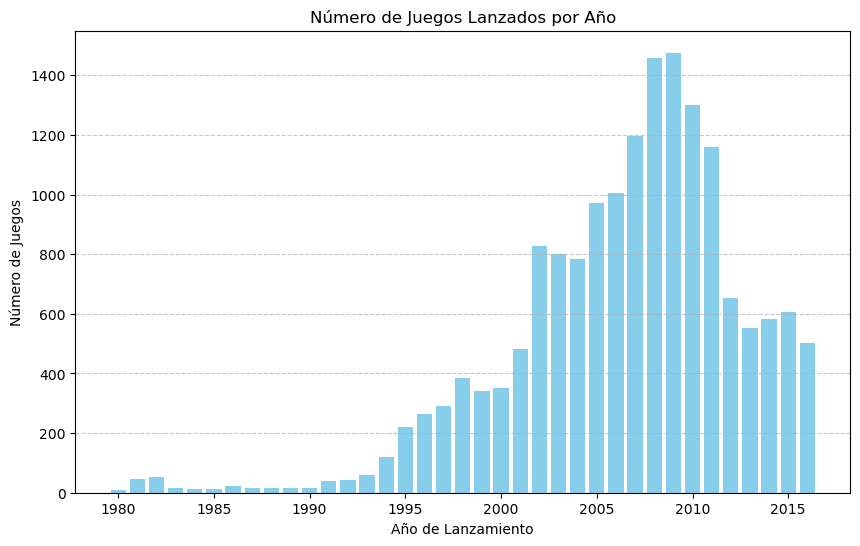

In [22]:
# Graficar los resultados
plt.figure(figsize=(10, 6))
plt.bar(dataset_year['year_of_release'], dataset_year['name'], color='skyblue')
plt.xlabel('Año de Lanzamiento')
plt.ylabel('Número de Juegos')
plt.title('Número de Juegos Lanzados por Año')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

#### Respuesta

Podemos observar que del año 1980 a 1993 pudiera ser una etapa 'temprana' en la industria de los videojuegos, ya que la cantidad de juegos lanzados es poca y no varía mucho año con año. A partir del año 1994, y hasta el año 2009, podriamos considerar que estamos en una etapa de auge o crecimiento en la industria, en donde se observa la mayor cantidad de juegos lanzados y en claro incremento anual, sin embargo, a partir del año 2010 en adelante, la industria experimenta un decremento y una caída significativa en el lanzamiento de los videojuegos, esto podría deberse quizá a la aparición de los smartphones entre otras causas, que son materia de estudio más a fondo en otro análisis. 

### 3.2 Observa cómo varían las ventas de una plataforma a otra. Elige las plataformas con las mayores ventas totales y construye una distribución basada en los datos de cada año. Busca las plataformas que solían ser populares pero que ahora no tienen ventas. ¿Cuánto tardan generalmente las nuevas plataformas en aparecer y las antiguas en desaparecer?

In [23]:
# Verificar el número total de plataformas en el dataset
dataset['platform'].nunique()

31

In [24]:
# Verificar los nombres de las plataformas en el dataset y sus ventas totales
platform_names = dataset.groupby('platform')['total_sales'].sum().reset_index().sort_values(by='total_sales')
platform_names

,platform,total_sales
14,PCFX,0.03
9,GG,0.04
1,3DO,0.10
24,TG16,0.16
25,WS,1.42
12,NG,1.44
22,SCD,1.86
3,DC,15.95
8,GEN,28.35
21,SAT,33.59


In [25]:
# Agrupar total sales por plataforma y ordenar por el Top 5 con mayores ventas
dataset_platform = dataset.groupby('platform')['total_sales'].sum().sort_values(ascending=False).head()
dataset_platform

platform
PS2     1255.77
X360     971.42
PS3      939.65
Wii      907.51
DS       806.12
Name: total_sales, dtype: float64

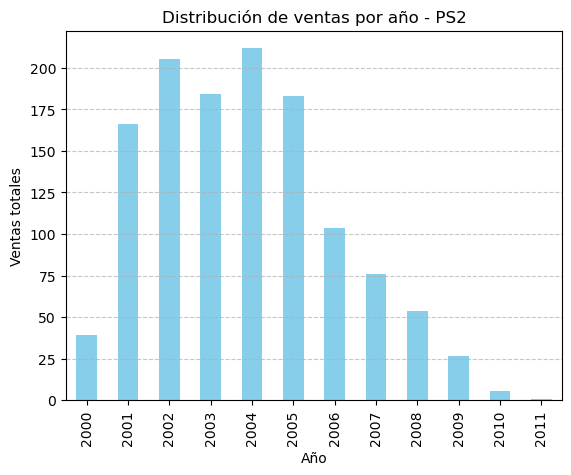

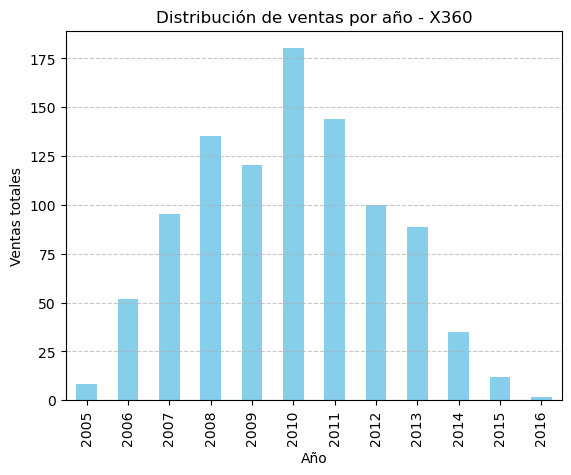

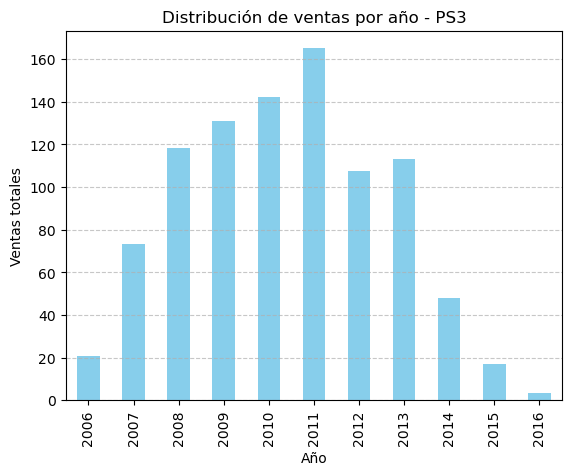

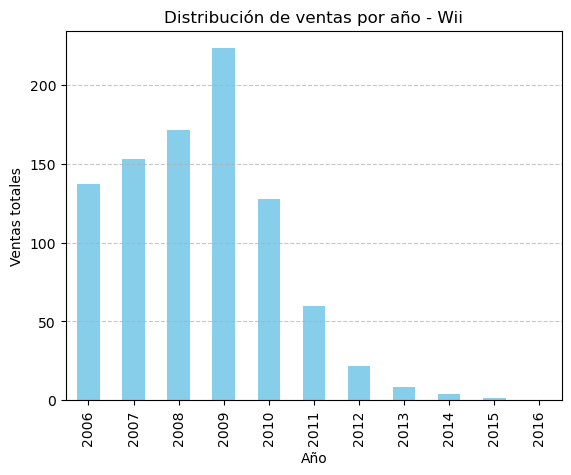

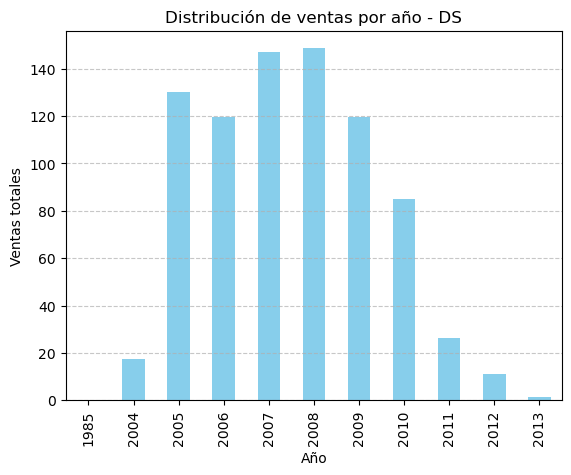

In [26]:
# Distribución de ventas por año para cada plataforma
for platform in dataset_platform.index:
    sales_by_year = dataset[dataset['platform'] == platform].groupby('year_of_release')['total_sales'].sum()
    
    sales_by_year.plot(kind='bar', title=f'Distribución de ventas por año - {platform}', color='skyblue')
    plt.xlabel('Año')
    plt.ylabel('Ventas totales')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()

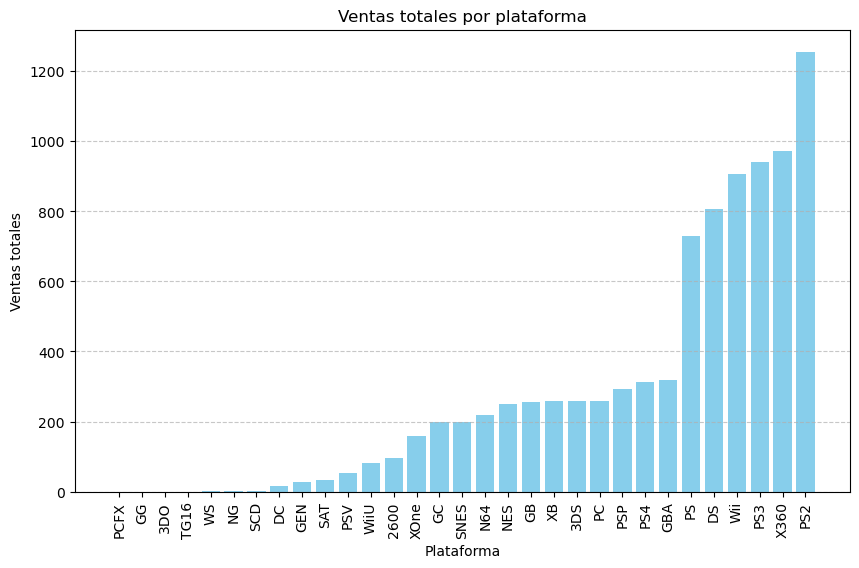

In [27]:
# Obtener los nombres de las plataformas y las ventas totales
platform_names = dataset.groupby('platform')['total_sales'].sum().reset_index().sort_values(by='total_sales')

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
plt.bar(platform_names['platform'], platform_names['total_sales'], color='skyblue')
plt.xlabel('Plataforma')
plt.ylabel('Ventas totales')
plt.title('Ventas totales por plataforma')
plt.xticks(rotation=90)  # Rotar los nombres de las plataformas para mayor legibilidad
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


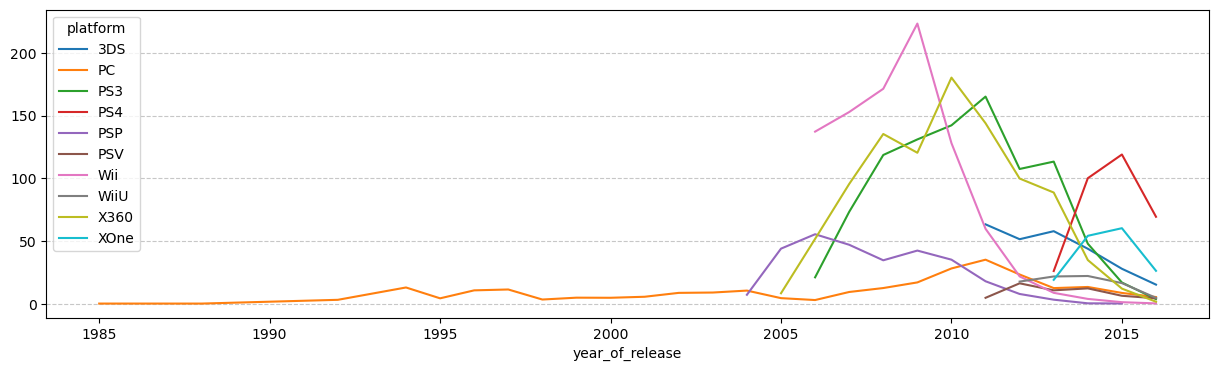

In [28]:
# Ciclo de vida de las plataformas, las que solían ser populares y ahora no tienen ventas
current_platforms = (
    dataset[dataset['year_of_release'] >= 2015]
    .groupby(['platform'])['total_sales']
    .sum()
    .sort_values(ascending = False)
    .head(10)
    .index
)

(
    dataset[dataset['platform'].isin(current_platforms)]
    .pivot_table(index = 'year_of_release', columns = 'platform', values = 'total_sales', aggfunc = 'sum')
    .plot(kind = 'line', figsize = (15, 4))
)

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [29]:
# Calcular la duración promedio de aparición de nuevas plataformas
appearance_years = dataset.groupby('platform')['year_of_release'].min()
disappearance_years = dataset.groupby('platform')['year_of_release'].max()

duration_appearance = disappearance_years - appearance_years

rounded_duration_appearance = round(duration_appearance.mean(), 2)

print('La duración promedio de aparición de nuevas plataformas es:', rounded_duration_appearance)


La duración promedio de aparición de nuevas plataformas es: 7.61


### 3.3 Determina para qué período debes tomar datos. Para hacerlo mira tus respuestas a las preguntas anteriores. Los datos deberían permitirte construir un modelo para 2017.

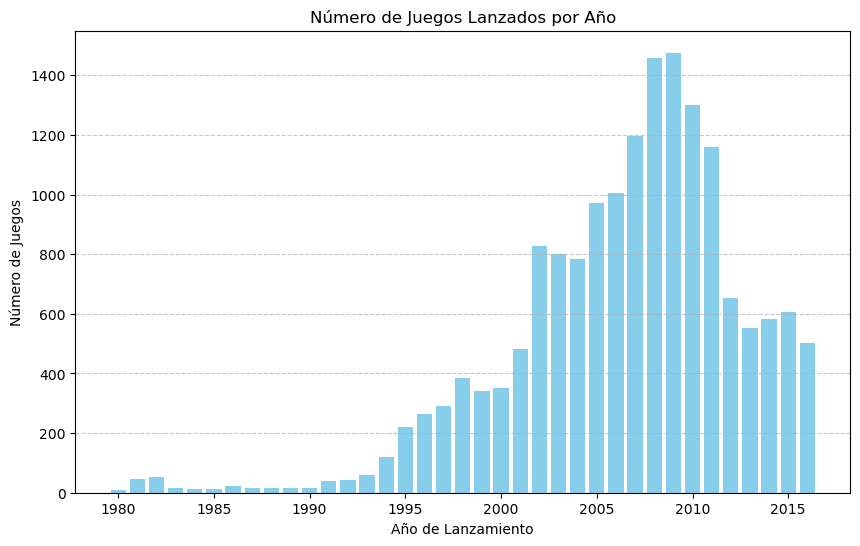

In [30]:
# Número de juegos lanzados por año
plt.figure(figsize=(10, 6))
plt.bar(dataset_year['year_of_release'], dataset_year['name'], color='skyblue')
plt.xlabel('Año de Lanzamiento')
plt.ylabel('Número de Juegos')
plt.title('Número de Juegos Lanzados por Año')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [31]:
# Filtrar el dataframe para que contenga información a partir del año 1994
dataset_year = dataset_year[dataset_year['year_of_release'] >= 1994]
dataset_year

,year_of_release,name
14,1994,121
15,1995,219
16,1996,263
17,1997,290
18,1998,386
19,1999,341
20,2000,350
21,2001,482
22,2002,829
23,2003,800


#### Respuesta

Personalmente eliminaría todos los datos desde el inicio hasta el año 1993, es decir, únicamente tomaría la información del año 1994 en adelante y me concentraría específicamente en la información del año 2009 en adelante, ya que a partir de este año se observa un declive en las ventas y el número de juegos lanzados por año, lo que lo hace propicio para una campaña de marketing y reposicionamiento de plataformas y videojuegos. 

### 3.4 Trabaja solo con los datos que consideras relevantes. Ignora los datos de años anteriores.

In [32]:
# Crear un nuevo dataset con las plataformas con mejores resultados de ventas después del año 2009 
dataset_platform_2009 = dataset.query('year_of_release > 2009')
dataset_platform_2009_rank = dataset_platform_2009.pivot_table(index=['platform'], 
                                                               values=['total_sales'], 
                                                               aggfunc=['count', 'sum', 'mean']).sort_values([('mean', 'total_sales')], 
                                                                                                             ascending=False)
dataset_platform_2009_rank

,count,sum,mean
,total_sales,total_sales,total_sales
platform,,,
PS4,392,314.14,0.801378
X360,710,560.59,0.789563
PS3,914,596.05,0.652133
XOne,247,159.32,0.645020
WiiU,147,82.19,0.559116
3DS,520,259.00,0.498077
Wii,450,222.97,0.495489
PC,496,125.72,0.253468


### 3.5 ¿Qué plataformas son líderes en ventas? ¿Cuáles crecen y cuáles se reducen? Elige varias plataformas potencialmente rentables.

In [33]:
# Agrupar total sales por plataforma y ordenar por el Top 10 con mayores ventas
top10_platform = dataset_platform_2009.groupby('platform')['total_sales'].sum().sort_values(ascending=False).head(10)
top10_platform

platform
PS3     596.05
X360    560.59
PS4     314.14
3DS     259.00
Wii     222.97
XOne    159.32
PC      125.72
DS      123.75
WiiU     82.19
PSP      64.05
Name: total_sales, dtype: float64

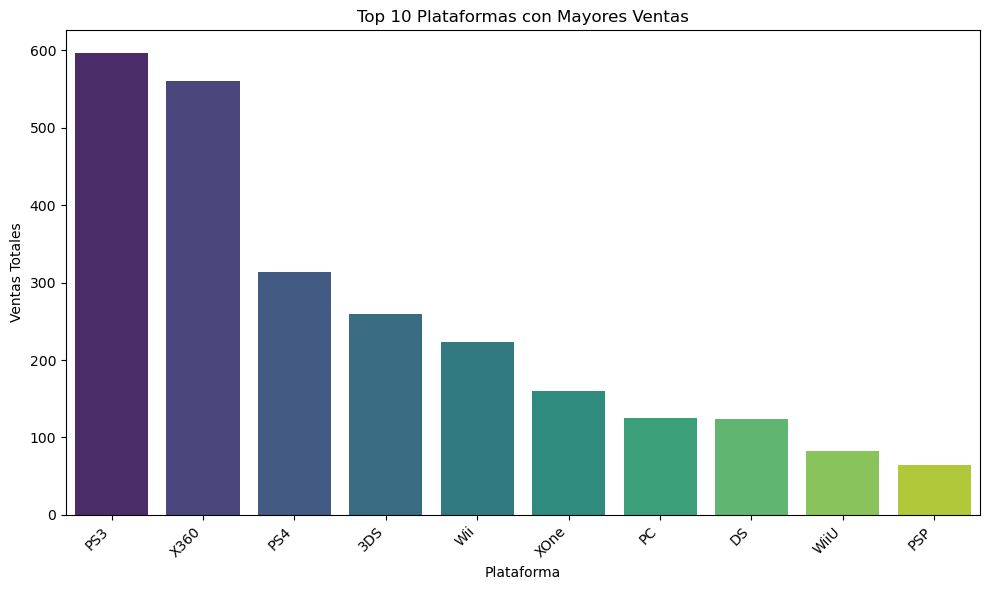

In [34]:
# Gráfica de los resultados Top 10 plataformas
plt.figure(figsize=(10, 6))
sns.barplot(x=top10_platform.index, y=top10_platform.values, palette='viridis')

# Personalizar la gráfica
plt.title('Top 10 Plataformas con Mayores Ventas')
plt.xlabel('Plataforma')
plt.ylabel('Ventas Totales')
plt.xticks(rotation=45, ha='right')  

plt.tight_layout()
plt.show()

#### Respuesta

Elegí las plataformas en sus versiones más recientes, quizá si analizamos a detalle el histórico, hay algunas plataformas que tienen muy buenas ventas, incluso mejores que algunas plataformas más recientes, sin embargo, decidí obtener sólo las versiones más recientes ya que el comportamiento 'usual' es que las plataformas anteriores ocurra un declive tanto en la producción de videojuegos, como en sus ventas y su difusión. Por lo tanto, tomando en cuenta las plataformas más nuevas, se puede observar una dominancia en el mercado por Play Station, Xbox y Nintendo.

### 3.6 Crea un diagrama de caja para las ventas globales de todos los juegos, desglosados por plataforma. ¿Son significativas las diferencias en las ventas? ¿Qué sucede con las ventas promedio en varias plataformas? Describe tus hallazgos.

(0.0, 5.0)

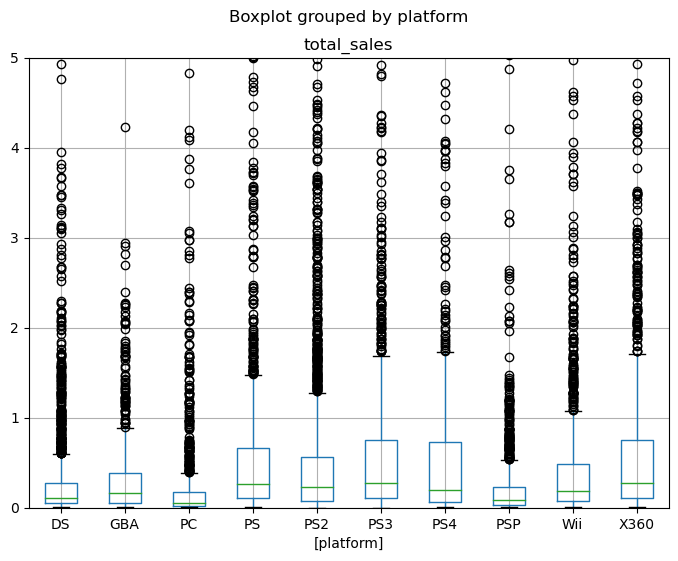

In [35]:
# Diagrama de caja agrupado por plataforma y las ventas totales
top10_platform = dataset.groupby('platform')['total_sales'].sum().nlargest(10).index
dataset[dataset['platform'].isin(top10_platform)][['platform', 'total_sales']].boxplot(by='platform', figsize=(8, 6))
plt.ylim(0, 5)


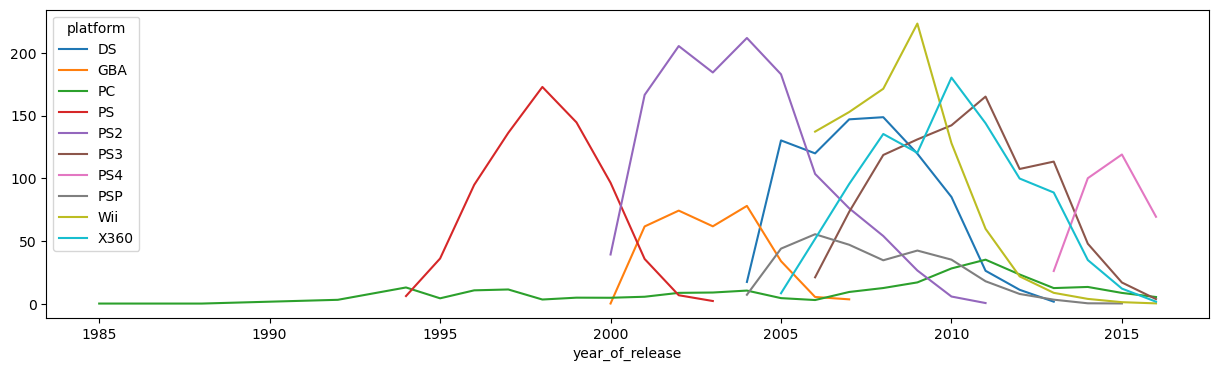

In [36]:
# Comportamiento de las ventas por plataforma en un periodo de tiempo
dataset[dataset['platform'].isin(top10_platform)].pivot_table(index='year_of_release', columns='platform', values='total_sales', aggfunc='sum').plot(kind='line', figsize=(15,4))
plt.show()

#### Respuesta

Podemos observar que para los años más recientes de este estudio, existe una clara y directa competencia entre PS3 y X360, donde aumentaron su participación prácticamente a la par, para después disputarse el dominio del mercado, aproximadamente para 2013 inicia el lanzamiento de la nueva versión de la consola de Play Station 'PS4' que sigue la misma tendencia de crecimiento, sin embargo, su rival XOne ya no muestra ser una competencia para este producto (como se puede observar en las tablas anteriores)

### 3.7 Mira cómo las reseñas de usuarios y profesionales afectan las ventas de una plataforma popular (tu elección). Crea un gráfico de dispersión y calcula la correlación entre las reseñas y las ventas. Saca conclusiones.

In [37]:
# Comprobar la correlación entre las ventas totales y la calificación del usuario 
dataset_platform_2009['total_sales'].corr(dataset_platform_2009['user_score'])

-0.02988155959307721

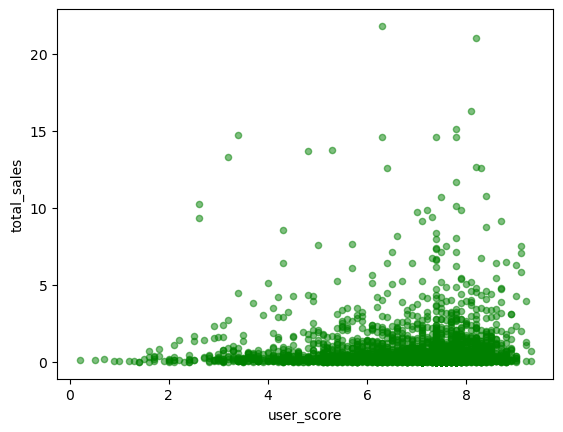

In [38]:
# Gráfica de dispersión de las ventas basándose en la calificación del usuario 
dataset_platform_2009.plot(x='user_score', y='total_sales', kind='scatter', alpha=0.5, color="green")

plt.show()

#### Respuesta

La correlación entre las ventas totales y la calificación del usuario es aproximadamente -0.03. Esto sugiere una correlación muy débil entre estas dos variables. 

Algunos de los factores que pueden influir en esto son: el marketing, la calidad del juego, la popularidad de la plataforma, entre otros. 

Puede ser que alguno de estos factores estén influyendo más en las ventas que la calificación de los usuarios.

In [39]:
# Comprobar la correlación entre las ventas totales y la calificación de la crítica
dataset_platform_2009['total_sales'].corr(dataset_platform_2009['critic_score'])

0.2825467308034219

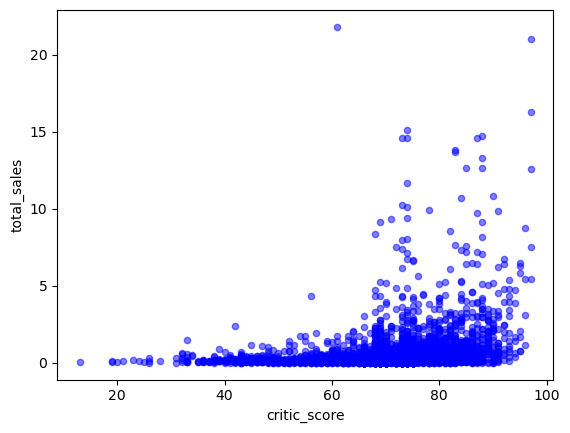

In [40]:
# Gráfica de dispersión de las ventas basándose en la calificación de la crítica
dataset_platform_2009.plot(x='critic_score', y='total_sales', kind='scatter', alpha=0.5, color="blue")

plt.show()

#### Respuesta

La correlación entre las ventas totales y la calificación de la crítica es de aproximadamente 0.28. Esto sugiere una correlación moderada positiva entre las dos variables. 

En decir, existe una tendencia a que las ventas totales aumenten cuando la calificación de la crítica es más alta.

Por consiguiente, podríamos decir que los usuarios toman más en cuenta la calificación de los expertos (la crítica) que la calificación de otros usuarios para tomar la decisión de adquirir un nuevo videojuego.


### 3.8 Teniendo en cuenta tus conclusiones compara las ventas de los mismos juegos en otras plataformas.

In [41]:
# Crear una serie booleana que indica si hay duplicados en la columna 'name'
duplicates_mask = dataset.duplicated(subset=['name'], keep=False)

# Filtrar los datos para mostrar solo las filas con nombres duplicados
duplicates = dataset[duplicates_mask]

duplicates['name'].unique()


array(['Super Mario Bros.', 'Tetris', 'Grand Theft Auto V', ...,
       'Sakura-Sou no Pet na Kanojo', 'Heart no Kuni no Alice',
       'Akatsuki no Goei Trinity'], dtype=object)

In [42]:
# Mostrar la información de los nombres de videojuegos que aparecen repetidos
duplicates

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,69.0,7.7,E,40.24
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,70.0,7.5,E,30.26
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
17,Grand Theft Auto: San Andreas,PS2,2004,Action,9.43,0.40,0.41,10.57,95.0,9.0,M,20.81
18,Super Mario World,SNES,1990,Platform,12.78,3.75,3.54,0.55,69.0,7.7,E,20.62
...,...,...,...,...,...,...,...,...,...,...,...,...
16706,Men in Black II: Alien Escape,GC,2003,Shooter,0.01,0.00,0.00,0.00,73.0,7.4,T,0.01
16709,SCORE International Baja 1000: The Official Game,PS2,2008,Racing,0.00,0.00,0.00,0.00,69.0,7.4,E,0.00
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,68.0,7.4,T,0.01
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,69.0,7.7,E,0.01


In [43]:
# Mostrar la información del videojuego 'Grand Theft Auto V' para visualizar las plataformas en las que aparece
gta_duplicates = duplicates[duplicates['name'] == 'Grand Theft Auto V']
gta_duplicates


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
165,Grand Theft Auto V,XOne,2014,Action,2.81,2.19,0.00,0.47,97.0,7.9,M,5.47
1730,Grand Theft Auto V,PC,2015,Action,0.39,0.69,0.00,0.09,96.0,7.9,M,1.17


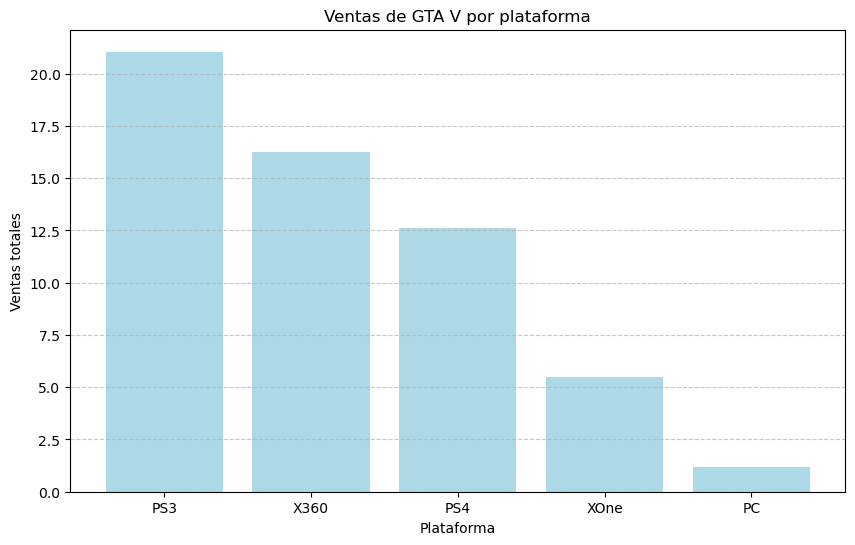

In [44]:
# Graficar los resultados de las ventas de 'GTA V' en distintas plataformas
platforms = gta_duplicates['platform']
sales = gta_duplicates['total_sales']

plt.figure(figsize=(10, 6))
plt.bar(platforms, sales, color = 'lightblue')
plt.xlabel('Plataforma')
plt.ylabel('Ventas totales')
plt.title('Ventas de GTA V por plataforma')
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()


#### Respuesta

Aquí podemos observar claramente lo que mencionaba en puntos anteriores, elegí el videojuego 'Grand Theft Auto V' por ser uno de los que más ventas tenía en todas las plataformas y para que los resultados fueran realmente significativos. La plataforma PS3 tuvo mucho éxito en ese periódo de tiempo y marcó una dominancia sobre sus competidores, sin embargo, X360 que en ese momento competía a la par también muestra datos similares y PS4 que es la nueva versión para la consola, también está muy cerca de X360. A partir de aquí, se muestra una marcada disminución en ventas para este juego tan exitoso para las plataformas de XOne que realmente no logró ser un competidor para las plataformas de Sony, y para PC que quizá en ese periódo de tiempo aún no contaban con las características necesarias para convertirse en un claro competidor, de entre las demás opciones.

### 3.9 Echa un vistazo a la distribución general de los juegos por género. ¿Qué se puede decir de los géneros más rentables? ¿Puedes generalizar acerca de los géneros con ventas altas y bajas?

In [45]:
# Crear un nuevo dataset para videojuegos lanzados después del año 2009
dataset_after_2009 = dataset.query('year_of_release > 2009' and 'platform == ["PS4", "3DS", "XOne"]')
dataset_after_2009

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,73.0,7.4,M,14.63
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,74.0,7.8,T,14.60
40,Mario Kart 7,3DS,2011,Racing,5.03,4.02,2.69,0.91,85.0,8.2,E,12.65
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
47,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014,Role-Playing,4.35,3.49,3.10,0.74,74.0,7.8,T,11.68
...,...,...,...,...,...,...,...,...,...,...,...,...
16660,Prison Architect,XOne,2016,Action,0.01,0.00,0.00,0.00,74.0,6.7,T,0.01
16668,Fujiko F. Fujio Characters: Great Assembly! Sl...,3DS,2014,Action,0.00,0.00,0.01,0.00,68.0,7.4,T,0.01
16672,Metal Gear Solid V: The Definitive Experience,XOne,2016,Action,0.01,0.00,0.00,0.00,68.0,7.4,M,0.01
16677,Aikatsu Stars! My Special Appeal,3DS,2016,Action,0.00,0.00,0.01,0.00,68.0,7.4,T,0.01


In [46]:
# Comprobar el número de géneros disponibles
dataset_after_2009['genre'].nunique()

12

In [47]:
# Agrupar las ventas totales por género y seleccionar el top 5 con las ventas más altas
dataset_genre = dataset_after_2009.groupby('genre')['total_sales'].sum().sort_values(ascending=False).head()
dataset_genre

genre
Action          191.65
Shooter         150.18
Role-Playing    123.77
Sports           88.52
Platform         41.15
Name: total_sales, dtype: float64

In [48]:
# Comparativo del top 5 de géneros en cada región
top_genre_per_region = dataset_after_2009.query('genre == ["Action", "Sports", "Shooter", "Role-Playing", "Platform"]').groupby('genre').sum()[['na_sales', 'eu_sales', 'jp_sales', 'other_sales', 'total_sales']].reset_index(drop=False)
top_genre_per_region

,genre,na_sales,eu_sales,jp_sales,other_sales,total_sales
0,Action,74.00,68.14,28.61,20.90,191.65
1,Platform,16.23,14.45,6.97,3.50,41.15
2,Role-Playing,39.25,30.30,45.55,8.67,123.77
3,Shooter,70.18,57.31,3.17,19.52,150.18
4,Sports,37.03,36.88,2.99,11.62,88.52


In [49]:
# Comprobar las ventas por plataforma y género en cada región
sales_genre_platform = dataset_after_2009.groupby(['platform', 'genre']).sum()[['na_sales', 'eu_sales', 'jp_sales', 'other_sales', 'total_sales']].reset_index()
sales_genre_platform = sales_genre_platform.query('genre == ["Action", "Sports", "Shooter", "Role-Playing", "Platform"]')
sales_genre_platform

,platform,genre,na_sales,eu_sales,jp_sales,other_sales,total_sales
0,3DS,Action,19.80,12.85,22.66,2.93,58.24
4,3DS,Platform,13.27,10.51,6.48,2.27,32.53
7,3DS,Role-Playing,23.76,14.91,41.99,3.57,84.23
8,3DS,Shooter,0.66,0.35,0.20,0.08,1.29
10,3DS,Sports,1.66,2.17,1.98,0.36,6.17
12,PS4,Action,32.83,42.71,5.90,14.66,96.10
16,PS4,Platform,2.45,3.60,0.49,1.15,7.69
19,PS4,Role-Playing,9.34,11.96,3.55,4.14,28.99
20,PS4,Shooter,32.66,39.16,2.81,13.93,88.56
22,PS4,Sports,19.78,25.98,0.99,8.86,55.61


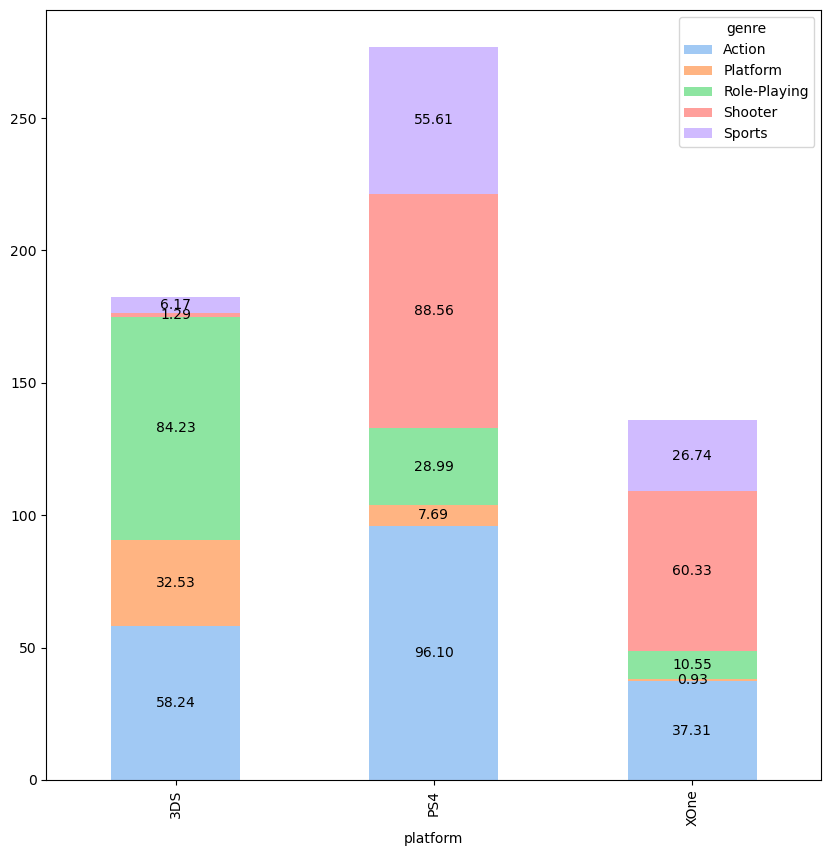

In [50]:
# Gráfico comparativo por plataforma y género en cada región con la nueva paleta de colores
palette = sns.color_palette("pastel")


output = sales_genre_platform.pivot_table("total_sales", "genre", "platform", "sum")
ax = output.T.plot.bar(stacked=True, figsize=(10, 10), color=palette)

for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.text(x+width/2, 
            y+height/2, 
            '{:.2f}'.format(height), rotation=0,
            horizontalalignment='center', 
            verticalalignment='center')


#### Respuesta

Los géneros más populares son 'Action', 'Shooter' y 'Role Playing'. Una vez más, encaminé este análisis a las versiones más nuevas de las consolas (PS4, 3DS y XOne) para que los resultados puedan ser más útiles en un estudio más a futuro (del año 2017) y podemos observar que independiente de la plataforma que elijan los usuarios, un videojuego podría ser más exitoso si la temática fuera de cualquiera de estos géneros más populares, obviamente hay mayor posibilidad si fuera de 'Action' que de 'Platform' sin embargo, esta podría ser una forma de 'asegurar' el éxito en el lanzamiento de un nuevo videojuego.

# Paso 4. Crea un perfil de usuario para cada región

### 4.1 Para cada región (NA, UE, JP) determina:
*	Las cinco plataformas principales. Describe las variaciones en sus cuotas de mercado de una región a otra.
*	Los cinco géneros principales. Explica la diferencia.
*	Si las clasificaciones de ESRB afectan a las ventas en regiones individuales.


### Las 5 plataformas principales para cada región

#### América del Norte

In [51]:
# Calcular la proporción de las ventas totales de cada plataforma en la región 'na' respecto a las ventas totales
region = 'na'
region_sales = f'{region}_sales'

popular_platforms = dataset_platform_2009.groupby('platform')[region_sales].sum().sort_values(ascending = False).head(5).index

print(region)
dataset_platform_2009[dataset_platform_2009['platform'].isin(popular_platforms)].groupby('platform')[region_sales].sum() / dataset_platform_2009[region_sales].sum()

na


platform
PS3     0.203572
PS4     0.095166
Wii     0.106070
X360    0.298353
XOne    0.081495
Name: na_sales, dtype: float64

#### Unión Europea

In [52]:
# Calcular la proporción de las ventas totales de cada plataforma en la región 'eu' respecto a las ventas totales
region = 'eu'
region_sales = f'{region}_sales'

popular_platforms = dataset_platform_2009.groupby('platform')[region_sales].sum().sort_values(ascending = False).head(5).index

print(region)
dataset_platform_2009[dataset_platform_2009['platform'].isin(popular_platforms)].groupby('platform')[region_sales].sum() / dataset_platform_2009[region_sales].sum()

eu


platform
PC      0.083492
PS3     0.255200
PS4     0.166172
Wii     0.077627
X360    0.195334
Name: eu_sales, dtype: float64

#### Japón

In [53]:
# Calcular la proporción de las ventas totales de cada plataforma en la región 'jp' respecto a las ventas totales
region = 'jp'
region_sales = f'{region}_sales'

popular_platforms = dataset_platform_2009.groupby('platform')[region_sales].sum().sort_values(ascending = False).head(5).index

print(region)
dataset_platform_2009[dataset_platform_2009['platform'].isin(popular_platforms)].groupby('platform')[region_sales].sum() / dataset_platform_2009[region_sales].sum()

jp


platform
3DS    0.328804
DS     0.091126
PS3    0.196100
PSP    0.137832
PSV    0.071562
Name: jp_sales, dtype: float64

### Los 5 géneros principales para cada región

#### América del Norte

In [54]:
# Calcular la proporción de las ventas totales de los géneros de juegos más populares en 'na' respecto a las ventas totales de todas las categorías de juegos
region = 'na'
region_sales = f'{region}_sales'
groupby_col = 'genre'

popular_category = dataset_platform_2009.groupby(groupby_col)[region_sales].sum().sort_values(ascending=False).head(5).index

print(region)
dataset_platform_2009[dataset_platform_2009[groupby_col].isin(popular_category)].groupby(groupby_col)[region_sales].sum() / dataset_platform_2009[region_sales].sum()


na


genre
Action          0.257351
Misc            0.111286
Role-Playing    0.098377
Shooter         0.209287
Sports          0.138416
Name: na_sales, dtype: float64

#### Unión Europea

In [55]:
# Calcular la proporción de las ventas totales de los géneros de juegos más populares en 'eu' respecto a las ventas totales de todas las categorías de juegos
region = 'eu'
region_sales = f'{region}_sales'
groupby_col = 'genre'

popular_category = dataset_platform_2009.groupby(groupby_col)[region_sales].sum().sort_values(ascending=False).head(5).index

print(region)
dataset_platform_2009[dataset_platform_2009[groupby_col].isin(popular_category)].groupby(groupby_col)[region_sales].sum() / dataset_platform_2009[region_sales].sum()

eu


genre
Action          0.278661
Misc            0.078817
Role-Playing    0.089099
Shooter         0.203531
Sports          0.138400
Name: eu_sales, dtype: float64

#### Japón

In [56]:
# Calcular la proporción de las ventas totales de los géneros de juegos más populares en 'jp' respecto a las ventas totales de todas las categorías de juegos
region = 'jp'
region_sales = f'{region}_sales'
groupby_col = 'genre'

popular_category = dataset_platform_2009.groupby(groupby_col)[region_sales].sum().sort_values(ascending=False).head(5).index

print(region)
dataset_platform_2009[dataset_platform_2009[groupby_col].isin(popular_category)].groupby(groupby_col)[region_sales].sum() / dataset_platform_2009[region_sales].sum()

jp


genre
Action          0.237907
Adventure       0.051246
Misc            0.079368
Platform        0.051638
Role-Playing    0.338701
Name: jp_sales, dtype: float64

In [57]:
# Calcular los géneros más populares de todas las regiones respecto a las ventas totales 
popular_genres = dataset_platform_2009.groupby('genre')['total_sales'].sum().sort_values(ascending = False).head(5).index
popular_genres

Index(['Action', 'Shooter', 'Sports', 'Role-Playing', 'Misc'], dtype='object', name='genre')

### Las principales clasificaciones (ESRB) para cada región

#### América del Norte

In [58]:
# Calcular la proporción de las ventas totales de las categorías de juegos más populares en 'na' respecto a las ventas totales de todas las categorías de juegos
region = 'na'
region_sales = f'{region}_sales'
groupby_col = 'rating'

popular_category = dataset_platform_2009.groupby(groupby_col)[region_sales].sum().sort_values(ascending=False).head(5).index

print(region)
dataset_platform_2009[dataset_platform_2009[groupby_col].isin(popular_category)].groupby(groupby_col)[region_sales].sum() / dataset_platform_2009[region_sales].sum()

na


rating
E       0.285646
E10+    0.140639
EC      0.000989
M       0.357322
T       0.215405
Name: na_sales, dtype: float64

#### Unión Europea

In [59]:
# Calcular la proporción de las ventas totales de las categorías de juegos más populares en 'eu' respecto a las ventas totales de todas las categorías de juegos
region = 'eu'
region_sales = f'{region}_sales'
groupby_col = 'rating'

popular_category = dataset_platform_2009.groupby(groupby_col)[region_sales].sum().sort_values(ascending=False).head(5).index

print(region)
dataset_platform_2009[dataset_platform_2009[groupby_col].isin(popular_category)].groupby(groupby_col)[region_sales].sum() / dataset_platform_2009[region_sales].sum()

eu


rating
E       0.308176
E10+    0.118955
M       0.369915
RP      0.000094
T       0.202860
Name: eu_sales, dtype: float64

#### Japón

In [60]:
# Calcular la proporción de las ventas totales de las categorías de juegos más populares en 'jp' respecto a las ventas totales de todas las categorías de juegos
region = 'jp'
region_sales = f'{region}_sales'
groupby_col = 'rating'

popular_category = dataset_platform_2009.groupby(groupby_col)[region_sales].sum().sort_values(ascending=False).head(5).index

print(region)
dataset_platform_2009[dataset_platform_2009[groupby_col].isin(popular_category)].groupby(groupby_col)[region_sales].sum() / dataset_platform_2009[region_sales].sum()

jp


rating
E       0.312898
E10+    0.043179
EC      0.000000
M       0.106901
T       0.537022
Name: jp_sales, dtype: float64

#### Respuesta

Podemos observar, que en las tres regiones de análisis, tienen en común que una buena proporción de los jugadores (de acuerdo con las clasificaciones) son mayores de +18 años y adolescentes, y la otra parte la conforman juegos clasificados como 'E' (para todo público). Por lo que, podríamos decir, de acuerdo a los datos mostrados, que algunas de los jugadores ya son personas adultas o adolescentes que crecieron en su infancia con el inicio de las consolas y se han convertido en consumidores habituales. 

Si existen clasificaciones ('rating') favoritos que varían de región en región, sin embargo, un videojuego que puedan jugar cualquier persona, adolescentes y adultos podría ser una opción viable para las ventas.

# Paso 5. Prueba las siguientes hipótesis:

### 5.1 Las calificaciones promedio de los usuarios para las plataformas Xbox One y PC son las mismas.

In [61]:
# Filtrar los datos sólo para XOne
dataset_xone = dataset.query('platform == "XOne"')
dataset_xone

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
99,Call of Duty: Black Ops 3,XOne,2015,Shooter,4.59,2.11,0.01,0.68,73.0,7.4,M,7.39
165,Grand Theft Auto V,XOne,2014,Action,2.81,2.19,0.00,0.47,97.0,7.9,M,5.47
179,Call of Duty: Advanced Warfare,XOne,2014,Shooter,3.22,1.55,0.01,0.48,81.0,5.4,M,5.26
242,Halo 5: Guardians,XOne,2015,Shooter,2.78,1.27,0.03,0.41,84.0,6.4,T,4.49
270,Fallout 4,XOne,2015,Role-Playing,2.51,1.32,0.01,0.38,88.0,6.2,M,4.22
...,...,...,...,...,...,...,...,...,...,...,...,...
16630,Sébastien Loeb Rally Evo,XOne,2016,Racing,0.00,0.01,0.00,0.00,63.0,8.2,E,0.01
16643,Rugby Challenge 3,XOne,2016,Sports,0.00,0.01,0.00,0.00,75.0,6.6,E,0.01
16645,ZombiU,XOne,2016,Action,0.00,0.01,0.00,0.00,68.0,7.4,T,0.01
16660,Prison Architect,XOne,2016,Action,0.01,0.00,0.00,0.00,74.0,6.7,T,0.01


In [62]:
# Filtrar los datos sólo para PC
dataset_pc = dataset.query('platform == "PC"')
dataset_pc

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
85,The Sims 3,PC,2009,Simulation,0.99,6.42,0.0,0.60,86.0,7.6,T,8.01
138,World of Warcraft,PC,2004,Role-Playing,0.08,6.21,0.0,0.00,93.0,7.3,T,6.29
192,Diablo III,PC,2012,Role-Playing,2.44,2.16,0.0,0.54,88.0,4.0,M,5.14
195,Microsoft Flight Simulator,PC,1996,Simulation,3.22,1.69,0.0,0.20,70.0,7.5,E,5.11
218,StarCraft II: Wings of Liberty,PC,2010,Strategy,2.57,1.68,0.0,0.58,93.0,8.2,T,4.83
...,...,...,...,...,...,...,...,...,...,...,...,...
16690,Pony Friends 2,PC,2009,Simulation,0.00,0.01,0.0,0.00,70.0,7.5,E,0.01
16692,Metal Gear Solid V: Ground Zeroes,PC,2014,Action,0.00,0.01,0.0,0.00,80.0,7.6,M,0.01
16696,Breach,PC,2011,Shooter,0.01,0.00,0.0,0.00,61.0,5.8,T,0.01
16702,STORM: Frontline Nation,PC,2011,Strategy,0.00,0.01,0.0,0.00,60.0,7.2,E10+,0.01


In [63]:
# Calcular la varianza de XOne y 'user_score' 
dataset_xone['user_score'].var()

1.5727829893683545

In [64]:
# Calcular la varianza de PC y 'user_score'
dataset_pc['user_score'].var()

1.8959728374531235

In [65]:
# Realiza una prueba t student para comparar las calificaciones de usuarios entre 'dataset_xone' y 'dataset_pc'
alpha = 0.05 # Se establece nivel de significancia en 0.05
results = st.ttest_ind(dataset_xone['user_score'], dataset_pc['user_score'], equal_var=True)
print('p-value:', results.pvalue)
if (results.pvalue < alpha):
    print('Rechazamos la hipótesis nula H0')
else:
    print('No podemos rechazar la hipótesis nula H0')

p-value: 3.5341366694379986e-05
Rechazamos la hipótesis nula H0


### Respuesta

Basándonos en los resultados de la prueba t student de hipótesis, rechazamos la hipótesis nula (H0) y aceptamos la hipótesis alterniva (H1).

Por lo tanto, podemos concluir que la calificación promedio de los usuarios para las plataformas Xbox One y PC es diferente. 

### 5.2 Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son diferentes. 

In [66]:
# Filtrar los datos para el género de 'Action' 
dataset_action = dataset.query('genre == "Action"')
dataset_action

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
17,Grand Theft Auto: San Andreas,PS2,2004,Action,9.43,0.40,0.41,10.57,95.0,9.0,M,20.81
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
24,Grand Theft Auto: Vice City,PS2,2002,Action,8.41,5.49,0.47,1.78,95.0,8.7,M,16.15
38,Grand Theft Auto III,PS2,2001,Action,6.99,4.51,0.30,1.30,97.0,8.5,M,13.10
...,...,...,...,...,...,...,...,...,...,...,...,...
16692,Metal Gear Solid V: Ground Zeroes,PC,2014,Action,0.00,0.01,0.00,0.00,80.0,7.6,M,0.01
16694,Carmageddon 64,N64,1999,Action,0.01,0.00,0.00,0.00,68.0,7.4,T,0.01
16695,Planet Monsters,GBA,2001,Action,0.01,0.00,0.00,0.00,67.0,7.4,E,0.01
16699,The Longest 5 Minutes,PSV,2016,Action,0.00,0.00,0.01,0.00,68.0,7.4,T,0.01


In [67]:
# Filtrar los datos para el género de 'Sports' 
dataset_sports = dataset.query('genre == "Sports"')
dataset_sports

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
13,Wii Fit,Wii,2007,Sports,8.92,8.03,3.60,2.15,80.0,7.7,E,22.70
15,Wii Fit Plus,Wii,2009,Sports,9.01,8.49,2.53,1.77,80.0,7.4,E,21.80
77,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82.0,4.3,E,8.58
...,...,...,...,...,...,...,...,...,...,...,...,...
16676,G1 Jockey 4 2008,PS3,2008,Sports,0.00,0.00,0.00,0.00,75.0,7.4,E,0.00
16688,Outdoors Unleashed: Africa 3D,3DS,2011,Sports,0.01,0.00,0.00,0.00,75.0,7.4,T,0.01
16693,PGA European Tour,N64,2000,Sports,0.01,0.00,0.00,0.00,75.0,7.4,E,0.01
16700,Mezase!! Tsuri Master DS,DS,2009,Sports,0.00,0.00,0.01,0.00,75.0,7.4,E,0.01


In [68]:
# Calcular la varianza del dataset 'action' y 'user_score'
dataset_action['user_score'].var()

1.1330517559499935

In [69]:
# Calcular la varianza del dataset 'sports' y 'user_score'
dataset_sports['user_score'].var()

1.267137488939846

In [70]:
# Realiza una prueba t student entre 'dataset_action' y 'dataset_sports'
alpha = 0.05 # Se establece el nivel de significancia en 0.05
results = st.ttest_ind(dataset_action['user_score'], dataset_sports['user_score'], equal_var=True)
print('p-value:', results.pvalue)
if (results.pvalue < alpha):
    print('Rechazamos la hipótesis nula H0')
else:
    print('No podemos rechazar la hipótesis nula H0')

p-value: 0.5342570517131008
No podemos rechazar la hipótesis nula H0


### Respuesta

Basándonos en los resultados de la prueba de hipótesis, hemos decidido aceptar la hipótesis nula (H0). 

Por lo tanto, concluimos que la calificación promedio de los usuarios para los géneros de Acción y Deportes es la misma.

### 5.3 Establece tú mismo el valor de umbral alfa.

Explica:

- Cómo formulaste las hipótesis nula y alternativa.
- Qué criterio utilizaste para probar las hipótesis y por qué.


### Respuesta

La hipótesis nula (H0) y la hipótesis alternativa (H1) para las prueba son las siguientes:

- H0: La calificación promedio del valor 'p' es la misma.
- H1: La calificación promedio del valor 'p' es diferente.

Para probar estas hipótesis, utilizaremos el método *st.ttest_ind( )*, que compara las medias de dos muestras independientes. 
1. Primero, crearemos poblaciones de datos separadas para ambas pruebas basadas en la columna user_rating. 
2. Después, utilizaremos los datos de población para todo el año para asegurar un tamaño de muestra adecuado para la prueba.

Antes de realizar la prueba de hipótesis, necesitamos verificar si las varianzas de las dos poblaciones son iguales. Esto se puede hacer utilizando una prueba estadística apropiada.

El valor alfa (nivel de significancia) para la prueba se establece en 5%. Si el valor p resultante de la prueba es menor que 0.05, rechazaremos la hipótesis nula (H0) y concluiremos que rechazamos la hipótesis nula. 
Por el contrario, si el valor p es mayor o igual a 0.05, aceptaremos la hipótesis nula (H0) y concluiremos que las muestras promedio de los usuarios son iguales.

Nota: Para este ejercicio de prueba de hipótesis, tomé toda la información disponible en el histórico para no sesgar la prueba y retroalimentar con la mayor cantidad de datos relevantes que fuera posible.



# Paso 6. Conclusión general

#### Comentarios Finales

- Las ventas de videojuegos han ido en aumento desde el año 1994, impulsadas principalmente por las plataformas de Sony (PlayStation), Microsoft (Xbox) y Nintendo. 
- La edad de las plataformas ha ido disminuyendo, con ventas que bajaron significativamente en los años 2010, posiblemente debido al aumento de los smartphones y los juegos móviles. Se necesita un análisis más detallado para confirmar esta hipótesis.
- Centramos nuestro análisis en las plataformas que aún tenían buen rendimiento a partir del año 2010, específicamente PS4, 3DS y XOne. PS4 surgió como la plataforma con mejor rendimiento a nivel mundial, mientras que la plataforma 3DS mostró una mayor popularidad en Japón y XOne no compitió en un nivel significativo con la plataforma de Sony.
- El género de Acción fue el más popular a nivel mundial, pero Japón mostró una preferencia por el género de Rol. 
- La clasificación M tuvo las ventas globales más altas, lo que nos indica que los principales consumidores son personas mayores de edad (+18) mientras que Japón mostró una preferencia por la clasificación T. 
- Las reseñas de críticos y usuarios no impactaron significativamente las ventas de videojuegos.
- Las pruebas de hipótesis revelaron que la calificación promedio de usuarios para las plataformas Xbox One y PC era diferente, mientras que la calificación promedio de usuarios para los géneros de Acción y Deportes fue la misma.
- Mis recomendaciones para el marketing de videojuegos en 2017 son: 
    * centrarse en la plataforma PS4, 
    * los géneros de Acción y Shooter, y 
    * la clasificación M a nivel mundial. 
- Otro acercamiento para las campañas de marketing, sería impulsar consolas y/o videojuegos que no ocupan el primer lugar en gustos del público pero si se encuentran dentro del Top 5 de preferencias.
